# Final Project, Part 2 -- Food Inspections (235.2 MB)
## Part 2 starts from the title Interactive Dashboard
### Junjie Yue

As you can see from the title, the name of the dataset is ''Food Inspections''. I downloaded it from Chicago Data Protal(https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv?accessType=DOWNLOAD). Here is a brief introduction I copied from its webpage:

This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). 
https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF

The license of the dataset can be found here:

 The data provided at this site is subject to change at any time.  It is understood that the data provided at this site is being used at one’s own risk.
 https://www.chicago.gov/city/en/narr/foia/data_disclaimer.html

In [1]:
# import the usual stuff
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
%matplotlib inline

This is a rather large dataset which means it's time-consuming to read it from URL, so I have downloded it first and only read in the columns needed. 

In [2]:
df = pd.read_csv('/Users/yuenick/Downloads/Food_Inspections.csv', usecols=[0,1,4,5,9,12,14,15])

# df = pd.read_csv('https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv', usecols=[0,1,4,5,9,12])

In [39]:
df

,Inspection ID,DBA Name,Facility Type,Risk,Zip,Results,Latitude,Longitude
13,2366687,BELMONT DONUTS INC.,Restaurant,2.0,60634.0,Pass,41.938493,-87.781197
16,2366660,"MISS ASIA, LLC",Restaurant,8.0,60614.0,Pass,41.932993,-87.640716
18,2366650,7-ELEVEN #33908A,Restaurant,2.0,60654.0,Pass,41.890829,-87.627890
25,2366598,FAT ALBERT,Restaurant,8.0,60636.0,Pass,41.768750,-87.664059
31,2366515,BAKERS SQUARE # 220658,Restaurant,8.0,60656.0,Pass,41.975202,-87.807211
36,2366416,BURGER KING #1512,Restaurant,2.0,60622.0,Pass,41.895863,-87.686192
39,2366378,NICK'S DRIVE INN,Restaurant,8.0,60631.0,Pass,42.012255,-87.806779
52,2366239,JERK TACO MAN 1,Restaurant,8.0,60624.0,Pass,41.876976,-87.725666
54,2366210,MOMENTUM COFFEE,Restaurant,2.0,60616.0,Pass,41.853650,-87.626956
59,2366165,"WENDY'S PROPERTIES, LLC",Restaurant,8.0,60634.0,Pass,41.952042,-87.807095


This is the dataset I picked up from Chicago Data Portal website. I only read in the columns needed. Here are some of its characteristics:
1. Inspection Id: the unique number of a single inspection. Data type: number.
2. DBA Name: ‘Doing business as.’ This is legal name of the establishment. Data type: text.
3. Facility Type: Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop. Data type: text.
4. Risk: Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. Data type: text.
5. Zip: zip number. Data type: number.
6. Results: An inspection can pass, pass with conditions or fail. Data type: text.
7&8. Latitudes and longitudes.

At this point, I am only interested in all restaurants that have fully passed the inspection.Thus, I need to filter  the dataframe under some certain conditions. 

In [4]:
df = df.loc[df['Facility Type'] == 'Restaurant']
df = df.loc[df['Results'] == 'Pass']

Below has shown the filtered dataframe

In [5]:
df

,Inspection ID,DBA Name,Facility Type,Risk,Zip,Results,Latitude,Longitude
13,2366687,BELMONT DONUTS INC.,Restaurant,Risk 2 (Medium),60634.0,Pass,41.938493,-87.781197
16,2366660,"MISS ASIA, LLC",Restaurant,Risk 1 (High),60614.0,Pass,41.932993,-87.640716
18,2366650,7-ELEVEN #33908A,Restaurant,Risk 2 (Medium),60654.0,Pass,41.890829,-87.627890
25,2366598,FAT ALBERT,Restaurant,Risk 1 (High),60636.0,Pass,41.768750,-87.664059
31,2366515,BAKERS SQUARE # 220658,Restaurant,Risk 1 (High),60656.0,Pass,41.975202,-87.807211
36,2366416,BURGER KING #1512,Restaurant,Risk 2 (Medium),60622.0,Pass,41.895863,-87.686192
39,2366378,NICK'S DRIVE INN,Restaurant,Risk 1 (High),60631.0,Pass,42.012255,-87.806779
52,2366239,JERK TACO MAN 1,Restaurant,Risk 1 (High),60624.0,Pass,41.876976,-87.725666
54,2366210,MOMENTUM COFFEE,Restaurant,Risk 2 (Medium),60616.0,Pass,41.853650,-87.626956
59,2366165,"WENDY'S PROPERTIES, LLC",Restaurant,Risk 1 (High),60634.0,Pass,41.952042,-87.807095


Chicago city is natually divided into small chunks according to zip codes of different parts of the city. I would like to know how many restaurants have passed the inspection in different areas of the city. 

In [6]:
count_by_zip = df.groupby(['Zip'], as_index=False)['Inspection ID'].count()

In [7]:
count_by_zip = pd.DataFrame(count_by_zip)

In [8]:
count_by_zip

,Zip,Inspection ID
0,60601.0,2010
1,60602.0,814
2,60603.0,1108
3,60604.0,740
4,60605.0,1513
5,60606.0,1774
6,60607.0,2355
7,60608.0,1709
8,60609.0,1235
9,60610.0,1531


In [37]:
count_by_zip.nsmallest(10, 'Inspection ID')

,Zip,Inspection ID
58,60827.0,6
31,60633.0,98
51,60656.0,273
50,60655.0,303
20,60621.0,318
57,60707.0,356
42,60645.0,375
23,60624.0,467
29,60631.0,478
48,60653.0,493


Make a bar plot to show the results.

[Text(0, 0, '60601.0'),
 Text(0, 0, '60602.0'),
 Text(0, 0, '60603.0'),
 Text(0, 0, '60604.0'),
 Text(0, 0, '60605.0'),
 Text(0, 0, '60606.0'),
 Text(0, 0, '60607.0'),
 Text(0, 0, '60608.0'),
 Text(0, 0, '60609.0'),
 Text(0, 0, '60610.0'),
 Text(0, 0, '60611.0'),
 Text(0, 0, '60612.0'),
 Text(0, 0, '60613.0'),
 Text(0, 0, '60614.0'),
 Text(0, 0, '60615.0'),
 Text(0, 0, '60616.0'),
 Text(0, 0, '60617.0'),
 Text(0, 0, '60618.0'),
 Text(0, 0, '60619.0'),
 Text(0, 0, '60620.0'),
 Text(0, 0, '60621.0'),
 Text(0, 0, '60622.0'),
 Text(0, 0, '60623.0'),
 Text(0, 0, '60624.0'),
 Text(0, 0, '60625.0'),
 Text(0, 0, '60626.0'),
 Text(0, 0, '60628.0'),
 Text(0, 0, '60629.0'),
 Text(0, 0, '60630.0'),
 Text(0, 0, '60631.0'),
 Text(0, 0, '60632.0'),
 Text(0, 0, '60633.0'),
 Text(0, 0, '60634.0'),
 Text(0, 0, '60636.0'),
 Text(0, 0, '60637.0'),
 Text(0, 0, '60638.0'),
 Text(0, 0, '60639.0'),
 Text(0, 0, '60640.0'),
 Text(0, 0, '60641.0'),
 Text(0, 0, '60642.0'),
 Text(0, 0, '60643.0'),
 Text(0, 0, '606

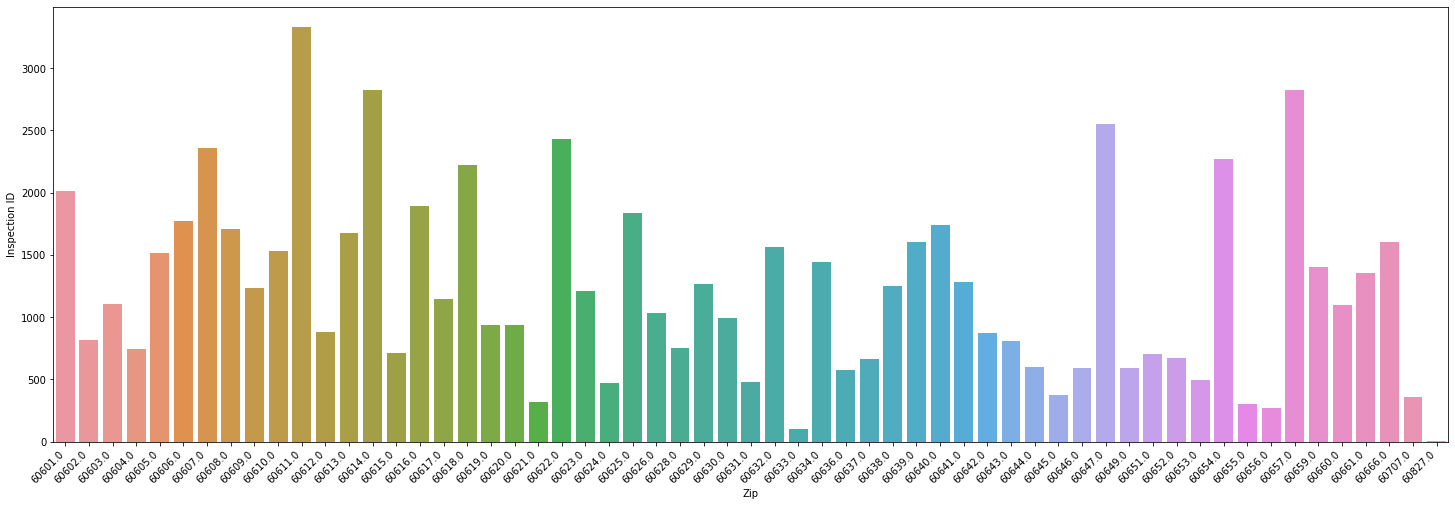

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,8))

chart = sns.barplot(
    x= count_by_zip['Zip'],
    y = count_by_zip['Inspection ID'], 
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

## Interactive Dashboard

In [10]:
# a super quick scatter plot
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

scatters = bqplot.Scatter(x = df['Longitude'],
                         y = df['Latitude'],
                         scales = {'x': x_sc, 'y': y_sc})
fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 



I want to color all the scatter points with the risk type. in order to do this, I need to convert string values in column risk to numbers.  

In [11]:
df.groupby(['Risk']).count()

,Inspection ID,DBA Name,Facility Type,Zip,Results,Latitude,Longitude
Risk,,,,,,,
Risk 1 (High),57633,57633,57633,57630,57633,57586,57586
Risk 2 (Medium),13776,13776,13776,13770,13776,13752,13752
Risk 3 (Low),702,702,702,701,702,699,699


In [12]:
# df.replace({'Risk':{'Risk 1 (High)': float(0.1), 'Risk 2 (Medium)': float(0.5), 'Risk 3 (Low)': float(0.8)}})
df.replace(to_replace ="Risk 1 (High)", value = float(8), inplace=True) 
df.replace(to_replace ="Risk 2 (Medium)", value =float(2), inplace=True) 
df.replace(to_replace ="Risk 3 (Low)", value =float(0.1), inplace=True) 

In [13]:
df['Risk'].unique()

array([2. , 8. , 0.1])

In [14]:
# create a scatter map with colorscale.
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Latitude')

c_sc = bqplot.ColorScale()

c_ax = bqplot.ColorAxis(scale = c_sc, label='Risk', 
                        orientation = 'vertical', side = 'right')
scatters = bqplot.Scatter(x = df['Longitude'],
                          y = df['Latitude'],
                          color= df['Risk'],
                          scales = {'x': x_sc, 'y': y_sc, 'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 


In [15]:
df['Longitude'].max(), df['Longitude'].min(),df['Latitude'].max(), df['Latitude'].min() 

(-87.5250941359867, -87.91442843927048, 42.02080847990217, 41.644670132198044)

In [16]:
# create the heatmap
nlong = 30 
nlat = 30
long_bins = np.linspace(-88, -87.5, nlong+1)
lat_bins = np.linspace(41.65, 42.05 , nlat+1)

hist2d, long_edges, lat_edges = np.histogram2d(df['Longitude'], 
                                               df['Latitude'], 
                                               weights=df['Risk'],
                                              bins = [long_bins,lat_bins])
long_centers = [(long_edges[i]+long_edges[i+1])*0.5 for i in range(len(long_edges)-1)]
lat_centers = [(lat_edges[i]+lat_edges[i+1])*0.5 for i in range(len(lat_edges)-1)]

hist2d = hist2d.T

In [17]:
col_sc = bqplot.ColorScale(scheme="RdPu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis - for colors, x & y
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical', 
                        side = 'right')#,
                       #label='log(sec)')
x_ax = bqplot.Axis(scale = x_sc, label='Longitude')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Latitude')

heat_map = bqplot.GridHeatMap(color = hist2d,
                              row = lat_centers, 
                              column = long_centers,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'blue'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})

#***GO BACK AND PLAY WITH BIN SIZES***

# (2) lets add a label again to pritn duration
# create label again
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = hist2d[i,j] # grab data value
    mySelectedLabel.value = 'Risk = ' + str(v) # set our label
        
        
        
        
# make sure we check out     
heat_map.observe(get_data_value, 'selected')


fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])

#(1)
#fig

#(2)
ipywidgets.VBox([mySelectedLabel,fig])

In [18]:
# (II) Bar plot
# scales & ax in usual way
x_scl = bqplot.OrdinalScale() 
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Risk Level', scale=x_scl)
ax_ycl = bqplot.Axis(label='Number of restaurants', scale=y_scl, 
                    orientation='vertical', side='left')
# for the bar plot of Number of restaurants in a region as a function of risk level. 
# lets start with a default region & risk level. 
i,j = 18,18
longs = [long_edges[i], long_edges[i+1]]
lats = [lat_edges[j],lat_edges[j+1]]
region_mask = ( (df['Latitude'] >= lats[0]) & (df['Latitude']<=lats[1]) &\
                (df['Longitude'] >= longs[0]) & (df['Longitude']<=longs[1]) )

# we can see this selects for the upper right point of our heatmap
df1 = df[region_mask]
type(df1)

pandas.core.frame.DataFrame

In [19]:
risk_barplot = df1.groupby(['Risk'],as_index=False).count()
x_value = risk_barplot['Risk']
y_value = risk_barplot['Inspection ID']

In [20]:
# make histogram by hand, weighting by risk level
risk_hist = bqplot.Bars(x=x_value, y= y_value, 
                          scales={'x':x_scl, 'y':y_scl})
fig_dur = bqplot.Figure(marks = [risk_hist], axes = [ax_xcl, ax_ycl])
fig_dur

Figure(axes=[Axis(label='Risk Level', scale=OrdinalScale(), side='bottom'), Axis(label='Number of restaurants'…

In [21]:
#  to what we've selected so:
def get_data_value(change):
    i,j = change['owner'].selected[0]
    v = hist2d[i,j] # grab data value
    mySelectedLabel.value = 'Risk = ' + str(v) # set our label
    # note!! i & j are swapped here to machup with hist & selection 
    longs = [long_edges[j], long_edges[j+1]]
    lats = [lat_edges[i],lat_edges[i+1]]
    region_mask = ( (df['Latitude'] >= lats[0]) & (df['Latitude']<=lats[1]) &\
                (df['Longitude'] >= longs[0]) & (df['Longitude']<=longs[1]) )
    if len(df[region_mask]) > 0:
        df1 = df[region_mask]
        risk_barplot = df1.groupby(['Risk'],as_index=False).count()
#         x_value = risk_barplot['Risk']
        x_value =['Risk 1','Risk 2','Risk 3']
        y_value = risk_barplot['Inspection ID']
        risk_hist.x = x_value
        risk_hist.y = y_value
  
heat_map.observe(get_data_value, 'selected')

fig.layout.min_width = '500px'
fig_dur.layout.min_width = '300px'
plots = ipywidgets.HBox([fig,fig_dur])
myout = ipywidgets.VBox([mySelectedLabel, plots])
myout

#### Risk category of facility: Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of inspection is tied to this risk, with risk 1 establishments inspected most frequently and risk 3 least frequently.
This is the description of the Risk element in the dataset. 
The heatmap image on the left shows the overall risk level of different rigions represtented by cells of the grid.Heigher the value is, the more likely the restaurants in that area are risky to affect the public's health.  

Once the user have chosen a certain area on the heatmap, the bar plot on the right shows the numbers of restaurants of that area in 3 different risk categories. 

##### Contextual Dataset:
Public Health Statistics- Selected public health indicators by Chicago community area
https://data.cityofchicago.org/api/views/iqnk-2tcu/rows.csv?accessType=DOWNLOAD

Use the dataset above to find the relationsip between restaurants' risk level and public health condition in certain area.

# Public Health Statistics dataset

In [25]:
dataset = pd.read_csv('https://data.cityofchicago.org/api/views/iqnk-2tcu/rows.csv?accessType=DOWNLOAD', usecols=[0,1,2,3,4])

In [26]:
dataset

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight
0,1,Rogers Park,16.4,62.0,11.0
1,2,West Ridge,17.3,83.3,8.1
2,3,Uptown,13.1,50.5,8.3
3,4,Lincoln Square,17.1,61.0,8.1
4,5,North Center,22.4,76.2,9.1
5,6,Lake View,13.5,38.7,6.3
6,7,Lincoln Park,13.2,38.7,6.6
7,8,Near North Side,10.7,35.9,8.6
8,9,Edison Park,11.3,59.5,7.9
9,10,Norwood Park,10.4,59.6,4.9


In [33]:
df1 = dataset.nsmallest(10, 'Birth Rate')
df1.sort_index()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight
7,8,Near North Side,10.7,35.9,8.6
8,9,Edison Park,11.3,59.5,7.9
9,10,Norwood Park,10.4,59.6,4.9
11,12,Forest Glen,10.0,60.6,7.6
12,13,North Park,10.9,54.2,9.7
31,32,Loop,9.4,27.7,5.3
34,35,Douglas,10.3,42.2,11.7
40,41,Hyde Park,9.7,33.9,5.9
47,48,Calumet Heights,10.0,57.4,9.3
71,72,Beverly,11.0,60.7,4.9


In [34]:
df2 = dataset.nsmallest(10, 'General Fertility Rate')
df2.sort_index()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight
2,3,Uptown,13.1,50.5,8.3
5,6,Lake View,13.5,38.7,6.3
6,7,Lincoln Park,13.2,38.7,6.6
7,8,Near North Side,10.7,35.9,8.6
31,32,Loop,9.4,27.7,5.3
34,35,Douglas,10.3,42.2,11.7
38,39,Kenwood,12.2,51.1,11.4
40,41,Hyde Park,9.7,33.9,5.9
53,54,Riverdale,12.5,46.1,15.3
76,77,Edgewater,12.1,48.1,7.5


In [36]:
df3 = dataset.nsmallest(10, 'Low Birth Weight')
df3.sort_index()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight
5,6,Lake View,13.5,38.7,6.3
6,7,Lincoln Park,13.2,38.7,6.6
9,10,Norwood Park,10.4,59.6,4.9
30,31,Lower West Side,16.5,68.2,4.5
31,32,Loop,9.4,27.7,5.3
40,41,Hyde Park,9.7,33.9,5.9
51,52,East Side,17.7,85.8,6.4
61,62,West Elsdon,20.8,92.3,4.6
71,72,Beverly,11.0,60.7,4.9
75,76,O'Hare,15.8,70.0,3.5


60657, 60614, 60610, 60611, 60610, 60654, 60603, 60601, 60615, 60620



In [53]:
list = [60657.0, 60614.0, 60610.0, 60611.0, 60603.0, 60616.0, 60615.0, 60620.0]
passed_restaurant = df.loc[df['Zip'].isin(list)]
sum_risk = passed_restaurant.groupby(["Zip"],as_index=False).sum()

In [54]:
count_risk = passed_restaurant.groupby(["Zip"],as_index=False).count()

In [55]:
sum_risk

,Zip,Inspection ID,Risk,Latitude,Longitude
0,60603.0,1627865637,7768.8,46403.680997,-97092.357459
1,60610.0,2188150029,10907.3,64154.771799,-134166.774228
2,60611.0,4715470479,23246.8,139382.554998,-291520.595138
3,60614.0,4047963827,19629.2,118561.420756,-247874.150419
4,60615.0,997069018,4600.4,29844.687816,-62543.147000
5,60616.0,2748071003,12986.0,79299.906043,-166060.428103
6,60620.0,1227864784,5120.1,39030.681544,-81954.218636
7,60657.0,4102421916,20102.9,118354.128345,-247360.006721


In [56]:
count_risk

,Zip,Inspection ID,DBA Name,Facility Type,Risk,Results,Latitude,Longitude
0,60603.0,1108,1108,1108,1108,1108,1108,1108
1,60610.0,1531,1531,1531,1531,1531,1531,1531
2,60611.0,3327,3327,3327,3327,3327,3327,3327
3,60614.0,2828,2828,2828,2828,2828,2828,2828
4,60615.0,714,714,714,714,714,714,714
5,60616.0,1895,1895,1895,1895,1895,1895,1895
6,60620.0,935,935,935,935,935,935,935
7,60657.0,2822,2822,2822,2822,2822,2822,2822


In [57]:
count_risk['Average risk'] = sum_risk["Risk"]/ count_risk['Risk']

In [61]:
avg_risk = count_risk[["Zip","Average risk"]]

In [62]:
avg_risk

,Zip,Average risk
0,60603.0,7.011552
1,60610.0,7.124298
2,60611.0,6.987316
3,60614.0,6.941018
4,60615.0,6.443137
5,60616.0,6.852770
6,60620.0,5.476043
7,60657.0,7.123636


In [70]:
index_df = dataset.loc[[5,6,7,9,31,34,40,71]]

In [107]:
index_df

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight
5,6,Lake View,13.5,38.7,6.3
6,7,Lincoln Park,13.2,38.7,6.6
7,8,Near North Side,10.7,35.9,8.6
9,10,Norwood Park,10.4,59.6,4.9
31,32,Loop,9.4,27.7,5.3
34,35,Douglas,10.3,42.2,11.7
40,41,Hyde Park,9.7,33.9,5.9
71,72,Beverly,11.0,60.7,4.9


In [79]:
index_df['Birth Rate'].to_numpy()


array([13.5, 13.2, 10.7, 10.4,  9.4, 10.3,  9.7, 11. ])

In [82]:
avg_risk['Birth Rate'] = index_df['Birth Rate'].to_numpy()
avg_risk['General Fertility Rate'] = index_df['General Fertility Rate'].to_numpy()
avg_risk['Low Birth Weight'] = index_df['Low Birth Weight'].to_numpy()
final_df = avg_risk

/Users/yuenick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yuenick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yuenick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [83]:
final_df

,Zip,Average risk,Birth Rate,General Fertility Rate,Low Birth Weight
0,60603.0,7.011552,13.5,38.7,6.3
1,60610.0,7.124298,13.2,38.7,6.6
2,60611.0,6.987316,10.7,35.9,8.6
3,60614.0,6.941018,10.4,59.6,4.9
4,60615.0,6.443137,9.4,27.7,5.3
5,60616.0,6.852770,10.3,42.2,11.7
6,60620.0,5.476043,9.7,33.9,5.9
7,60657.0,7.123636,11.0,60.7,4.9


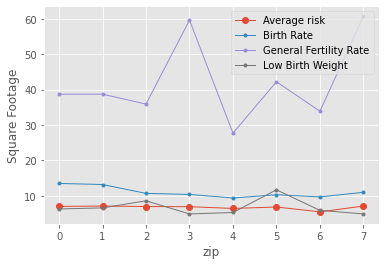

In [103]:

with plt.style.context("ggplot"):
    plt.plot(final_df["Average risk"], marker='o', linewidth = 1.0, label = "Average risk")
    plt.plot(final_df["Birth Rate"], marker='.', linewidth = 1.0, label = "Birth Rate")
    plt.plot(final_df["General Fertility Rate"], marker='.', linewidth = 1.0, label = "General Fertility Rate")
    plt.plot(final_df["Low Birth Weight"], marker='.', linewidth = 1.0, label = "Low Birth Weight")
    plt.xlabel("zip")
    plt.ylabel("Square Footage")

    plt.legend()

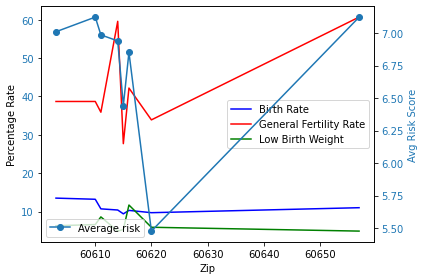

In [106]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Zip')
ax1.set_ylabel('Percentage Rate', color='black')
ax1.plot(final_df["Zip"], final_df["Birth Rate"], color='blue',label = "Birth Rate")
ax1.plot(final_df["Zip"], final_df["General Fertility Rate"], color='red', label = "General Fertility Rate")
ax1.plot(final_df["Zip"], final_df["Low Birth Weight"], color='green',label = "Low Birth Weight")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Avg Risk Score', color=color)  # we already handled the x-label with ax1
ax2.plot(final_df["Zip"], final_df["Average risk"], color=color,marker='o', label = "Average risk")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
